# Introduction to Python 4

In this file, we will become familiar with the curve_fit function from the scipy.optimize package to fit a curve to some experimental data and find the fit parameters.


## Defining the model's equation as a function

In order to fit a curve to experimental data we will need to define the model's equation as a function with some parameters that can be determined by the curve_fit function. For that we will use the define function syntax for defining the model's equation.


### Defining and calling a function

Defining and calling a function is a computational practice that can be useful when the same function needs to be called in several parts of the program or certain calculations can be done as part of it and the value be returned every time the function is called. In this program, we will use the first application. The syntax has two parts: the first line defines the function by a name followed by its independent variable and parameters in a parenthesis, and the second part includes the indentation, which returns the functional value or the value of a calculation based on the given function.

Once we define the function then whenever we need to call the function we can just type the name that we have given to the function in the define line followed by its parenthesis.

In the example below, we have defined the function of ${y=ax+b}$ as function_1.
The first term in the parentheses is the independent variable and a, and b are the parameters of the function that are separated by commas. In the indentation, we have defined the functional form, which in this case is ${ax+b}$.

We then use the function in an example.


In [1]:
def function_1(x, a, b):
  return a*x+b

print(function_1(5,2,3))

13


## curve_fit function syntax
The curve fit function from the scipy.optimize package provides the best fit parameter values written as popt (think of it as "parameter optimal") and the covariance matrix of the parameters written as pcov. (More on these below.) Inside the $p0$ bracket the initial guesses for the parameters can be provided and separated by comma(s). The syntax of the curve_fit function is as below:

popt, pcov=curve_fit (function, independent variable data, dependent variable data, p0=[])

While $p0$ is optional, it's a good idea to provide initial guesses, especially for oscillatory data. With no $p0$, the fit will guess 1 for each parameter.



### Finding the model's parameters and covariance matrix


The output of the curve_fit function are the parameter values and the covariance matrix. This matrix is related to the best-fit uncertainty of each parameter, as well as any correlation between the parameters. The diagonal elements of the covariance matrix are the variances of each parameter.

The square root of a variance indicates the standard error for a specific parameter value. The standard error for each parameter represents the precision of its value.

We can use the *print* statement in the program to print the optimal parameter values and the covariance matrix with the syntax below:

print(popt)

print(pcov)

To find the standard error of one of the parameters, for example the first parameter we can take the square root of the first element of the covariance matrix with the syntax below. The first diagonal element of the covariance matrix is indexed as pcov[0,0]. (Note the indices start at zero.)

### Plotting the fitted curve

We can plot the curve fit with the obtained parameters. For that we can call the function as part of the *plot* statement followed by its parenthesis. In this case, we need to replace the parameters with *popt as in the syntax below:

plot(independent variable, function(independent variable, *popt), label='Fitted curve', color='green')





## Importing experimental data to the program

In this program, we are going to fit the amplitude function, $A(f_d)$, which is equation (4.10) in the lab manual, as the model to the collected experimental data of the amplitude of the steady-state solution to find the parameters of the curve fitting, which are $A_0$, $f_0$, and $∆f$.


We have saved the experimental data as a csv file and have mounted it to Colab through the *file_path* statement.  The first column has the values of the driven frequency and the second column has the values of the driven amplitude.

The program below is just to plot the experimental data to see how it looks like.



In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

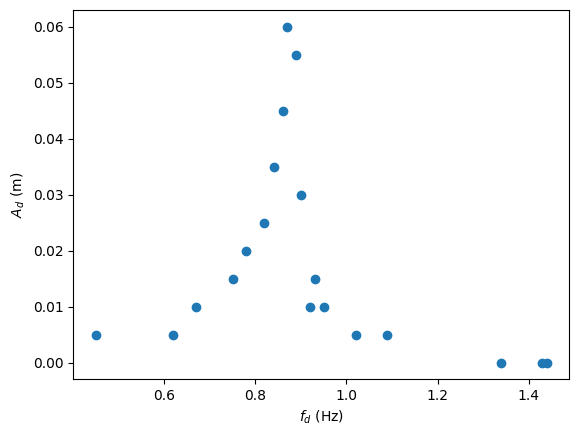

In [ ]:
from numpy import *
from pylab import plot, show, xlabel, ylabel

file_path1='/content/drive/MyDrive/data/Sweep3data.csv'


data1=loadtxt(file_path1, delimiter=',', skiprows=1, usecols=(0, 1), dtype=float)


x1=data1[:,0]
y1=data1[:,1]
plot (x1, y1, 'o') # Recall the 'o' plots points instead of connecting lines.


xlabel('$f_d$ (Hz)')
ylabel('$A_d$ (m)')
show()

In the program below, we will use the curve_fit function to fit the model (equation 4.10) to the experimental data.


[0.00256846 0.8741255  0.03622742]
[[ 7.43472342e-08 -1.54520982e-07  1.45276136e-06]
 [-1.54520982e-07  5.77682745e-06 -4.09989839e-06]
 [ 1.45276136e-06 -4.09989839e-06  3.59879195e-05]]


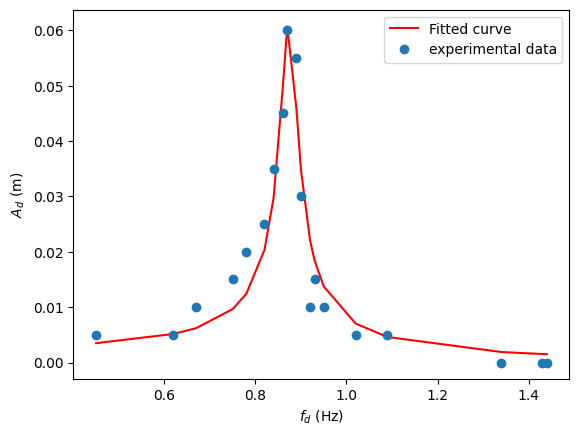

In [ ]:
from numpy import loadtxt, cos, sqrt
from pylab import plot, show, xlabel, ylabel, xlim, legend
from scipy.optimize import curve_fit


# The code below defines equation 4.10 as the model's function.
def amplitude(f_d, A_0,f_0, df):
    return A_0*f_0**2/(sqrt((f_0**2-f_d**2)**2+(df*f_d)**2))

file_path1='/content/drive/MyDrive/data/Sweep3data.csv'


data1=loadtxt(file_path1, delimiter=',', skiprows=1, usecols=(0, 1), dtype=float)

f_d=data1[:,0]
y=data1[:,1]

# This line obtains the fit parameters based on the initial guesses.
popt, pcov = curve_fit(amplitude, f_d, y, p0=[0.03,1,0.03])
print(popt)
print(pcov)

# Line below plots the updated model based on the obtained fit parameters.
#   Note the * on *popt
plot(f_d, amplitude(f_d, *popt), label='Fitted curve', color='red')

# Line below plots the experimental data.
plot(f_d, y, 'o', label='experimental data')

xlabel('$f_d$ (Hz)')
ylabel('$A_d$ (m)')
legend()
show()

Note the fitted curve is jagged because we've only calculated the amplitudes at the points where we have data. To make a smooth curve, just calculate at more points by use of the _linspace_ function.

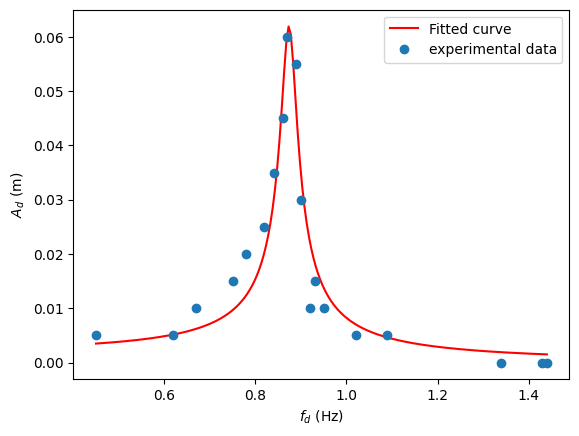

In [ ]:
f_smooth = linspace(min(f_d), max(f_d), 200)

# Line below plots the updated model based on the obtained fit parameters.
#   Note the * on *popt
plot(f_smooth, amplitude(f_smooth, *popt), label='Fitted curve', color='red')

# Line below plots the experimental data.
plot(f_d, y, 'o', label='experimental data')

xlabel('$f_d$ (Hz)')
ylabel('$A_d$ (m)')
legend()
show()

The code below prints the value of the standard error for the first parameter in the program, which is $A_0$. The value of the standard error rounded to the first non zero digit is 0.0003. The value of the parameter calculated from the program above is 0.0026. So the value of $A_0$ is $(0.0026 \pm 0.0003) {\rm m}$.

In [ ]:
SE_A_0=sqrt(pcov[0,0])
print ('SE of A_0=', SE_A_0)

SE of A_0= 0.00027266689232774167
